## Unsupervised dimensionality reduction via principal component analysis
- Similar to **feature selection**, we can use ** feature extraction** to reduce the number of features in a dataset.
- Feature extraction is used to improve computational efficiency but can also help to reduce the **curse of dimensionality**

### Principal Component Analysis (PCA)
- An unsupervised linear transformation technique that is widely used across different fields, most prominently for dimensionality reduction
- Other popular applications of PCA:
    - Exploratory data analyses and de-noising of signals in stock market trading
    - Analysis of genome data and gene expression levels
    - Identify patterns in data based on correlation between features.
    
- In a nutshell, PCA aims to find the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one.
![alt text](pca.JPG)

PCA explained with Wine Dataset

In [1]:
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
                      header=None)

In [4]:
# Cross Validation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [5]:
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
X = df_wine.iloc[:, 1:].values
y = df_wine.iloc[:, 0].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=0)

In [8]:
sc = StandardScaler()

In [9]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

**COnstructing the covariance matrix**
- The symmetric dxd dimensional covariance matrix, where d is the number of dimensions in the dataset, stores the pairwise covariances between the different features.
- The covariance between two features $x_{j}$ and $x_{k}$ is given by:
$${\color{Blue} \sigma _{jk} = \frac{1}{n}\sum_{i=1}^{n}\left (x_{j}^{(i)}-\mu _{j} \right)\left (x_{k}^{(i)}-\mu _{k} \right)}$$
- The sample means are zero after standardization
- Positive covariance indicates that the features increase or decrease together
- Negative covariance indicates that the features vary in opposite directions.
- $\sum$ stands for the covariance matrix and not the sum.
- For e.g, a covariance matrix of three features would like
$$\Sigma = \begin{bmatrix}
 \sigma _{1}^{1} & \sigma _{12}  & \sigma _{13} \\
 \sigma _{21} & \sigma _{2}^{2} & \sigma _{23} \\ 
 \sigma _{31} & \sigma _{32} & \sigma _{3}^{3}
\end{bmatrix}$$
- **The Eigenvectors represent the Principal Components.**
- **The Eigenvalues define their magnitude.**
- In the case of the Wine dataset, we get **13 eigenvectors** and **eigenvalues** from the 13x13 covariance matrix
- Eigenvalue v satisfies:
$$\Sigma \textbf{v}= \lambda \textbf{v}$$

In [10]:
cov_mat = np.cov(X_train_std.T)

In [11]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [12]:
print 'Eigen Values:\n\n', eigen_vals

Eigen Values:

[ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]


In [13]:
print 'Eigen Vectors:\n\n', eigen_vecs

Eigen Vectors:

[[  1.46698114e-01   5.04170789e-01  -1.17235150e-01   2.06254611e-01
   -1.87815947e-01  -1.48851318e-01  -1.79263662e-01  -5.54687162e-02
   -4.03054922e-01  -4.17197583e-01   2.75660860e-01   4.03567189e-01
    4.13320786e-04]
 [ -2.42245536e-01   2.42168894e-01   1.49946576e-01   1.30489298e-01
    5.68639776e-01  -2.69052764e-01  -5.92636731e-01   3.32731614e-02
   -1.01833706e-01   2.17101488e-01  -8.13845005e-02  -1.52474999e-01
   -8.78560762e-02]
 [ -2.99344215e-02   2.86984836e-01   6.56394387e-01   1.51536318e-02
   -2.99209426e-01  -9.33386061e-02   6.07334578e-02  -1.00618575e-01
    3.51841423e-01   1.28549846e-01  -1.29751275e-02   1.68376064e-01
   -4.52518598e-01]
 [ -2.55190023e-01  -6.46871827e-02   5.84282337e-01  -9.04220851e-02
   -4.12499478e-02  -1.01342392e-01   2.50323869e-01   5.61658566e-02
   -5.00457282e-01   4.73344124e-02   9.89088030e-02  -6.70902926e-02
    4.86169765e-01]
 [  1.20797723e-01   2.29953850e-01   8.22627466e-02  -8.3912834

**Variance Explained Ratio for each of the EigenValues is given by:**
$$\frac{\lambda _{j}}{\sum_{j=1}^{d}\lambda_{j}}$$

In [14]:
tot = sum(eigen_vals)

In [15]:
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

In [16]:
cum_var_exp = np.cumsum(var_exp)

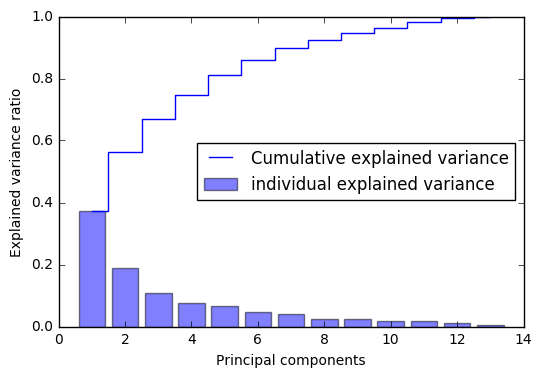

In [17]:
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', 
        label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', 
        label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [18]:
import seaborn as sns


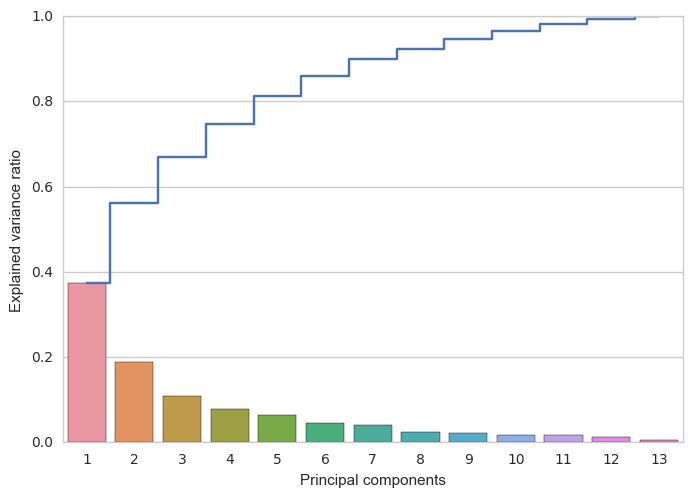

In [19]:
sns.set_style("whitegrid")
ax = sns.barplot(x=range(1,14), y=var_exp,)
ax.step(x=range(0,13), y=cum_var_exp, where='mid')
ax.set_ylabel('Explained variance ratio')
ax.set_xlabel('Principal components')

Feature Transformation
===========================
- After decomposing the covariance matrix into eigenpairs, 
    - Sort the eigenpairs by descending order of the eigenvalues
    - construct a projection matrix from the selected eigenvectors
    - Use the projection maatrix to transform the data onto the lower-dimensional subspace


In [20]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i])
              for i in range(len(eigen_vals))]

In [21]:
eigen_pairs.sort(reverse=True)

In [22]:
eigen_pairs

[(4.8923083032737438,
  array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
          0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
          0.30032535,  0.36821154,  0.29259713])),
 (2.466350315759231,
  array([ 0.50417079,  0.24216889,  0.28698484, -0.06468718,  0.22995385,
          0.09363991,  0.01088622,  0.01870216,  0.03040352,  0.54527081,
         -0.27924322, -0.174365  ,  0.36315461])),
 (1.4280997275048446,
  array([-0.11723515,  0.14994658,  0.65639439,  0.58428234,  0.08226275,
          0.18080442,  0.14295933,  0.17223475,  0.1583621 , -0.14242171,
          0.09323872,  0.19607741, -0.09731711])),
 (1.0123346209044954,
  array([ 0.20625461,  0.1304893 ,  0.01515363, -0.09042209, -0.83912835,
          0.19317948,  0.14045955,  0.33733262, -0.1147529 ,  0.07878571,
          0.02417403,  0.18402864,  0.05676778])),
 (0.8490645933450256,
  array([-0.18781595,  0.56863978, -0.29920943, -0.04124995, -0.02719713,
          0.14064543,

- Collect the two eigenvectors(for visualization purpose) that correspond to the two largest values to capture about 60 percent of the variance
- In Practice, the number of Principal components has to be determined from a trade-off between computational efficiency and the performance of the classifier

In [23]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
              eigen_pairs[1][1][:, np.newaxis]))
print 'Matrix W:\n\n', w

Matrix W:

[[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


- Above, we created a 13x2 dimensional projection matrix $W$ from the two eigenvectors.
- We can transform a sample $x$(represented as 1x13 dimensional row vector) onto the PCA subspace obtaining $x'$ using $$ x'=xW $$
- We transform the entire 124x13 dimensional training data set onto the two PCA by using $$X' = XW$$

In [24]:
X_train_std[0].dot(w)

array([ 2.59891628,  0.00484089])

In [25]:
X_train_pca = X_train_std.dot(w)

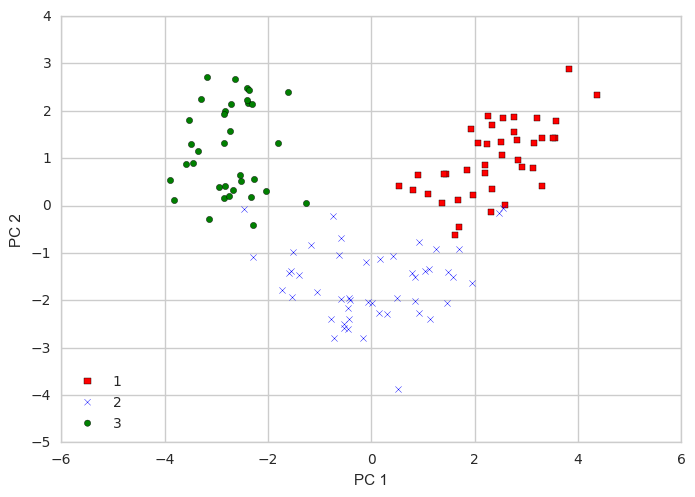

In [26]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
               X_train_pca[y_train == l, 1],
               c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

Principal Component Analysis in Scikit-learn
======================================

In [27]:
from matplotlib.colors import ListedColormap

In [28]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o','^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'green', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution ))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples 
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y =X[y == cl, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=2)
lr = LogisticRegression()

In [31]:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [32]:
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

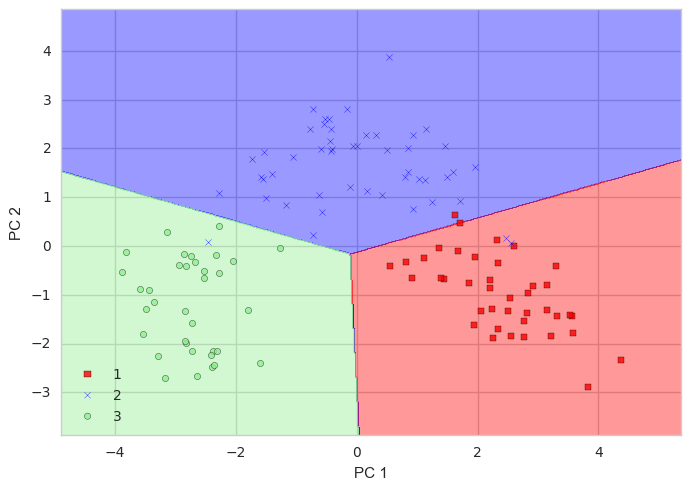

In [33]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

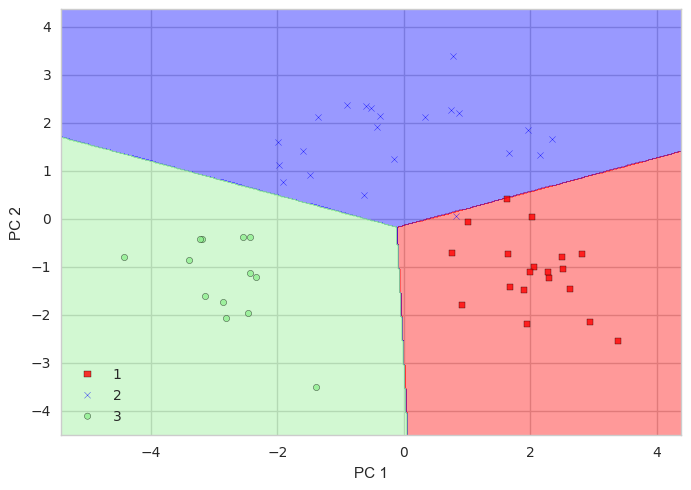

In [34]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

# Supervised data compression via Linear Discriminant Analysis(LDA)

- **LDA** can be used as a technique for feature extraction to increase the computational efficiency and reduce the degree of over-fitting due to the curse of dimensionality in non-regularized models.
_____________________________________________________________________________

- Whereas **PCA** attempts to find the orthogonal component axes of maximum variance in a dataset
- **LDA** finds the feature subspace that optimizes class separability.

_____________________________________
- LDA and PCA are linear transformation techniques that can be used to reduce the number of dimensions in a dataset
- **LDA** is a supervised learning algorithm
- **PCA** is an unsurpervised learning algorithm
____________________________________
#### Keys steps of the LDA approach:
1. Standardize the d-dimensional dataset( d is the number of features).
2. For each class, compute the d-dimensional mean vector.
3. Construct the between-class scatter matrix $S_{B}$ and the within-class scatter matrix $S_{w}$.
4. Compute the eigenvectors and corresponding eigenvalues of the matrix $S_{w}^{-1}S_{B}$.
5. Choose the k eigenvectors that correspond to the k largerst eigenvalues to construct a *dxk* -dimensional transformation matrix $W$; the eigenvectors are the columns of this matrix.
6. Project the samples onto the new feature subspace using the transformation matrix $W$.

### Computing the scatter matrices
- Each mean vector $m_i$ stores the mean feature value $\mu _m$ with respect to the samples of class $i$:
$$m_i = \frac{1}{n_i}\sum_{x \in D_i}^{c}x_m$$
- For our wine dataset, this result in three mean vectors
$$m_i = \begin{bmatrix}
\mu_{i,alcohol}\\ 
\mu_{i, malic acid}\\ 
\vdots \\ 
\mu_{i,proline}
\end{bmatrix} 
i \in \begin{Bmatrix}
1,2,3
\end{Bmatrix}$$

In [35]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print 'MV %s: %s\n' %(label, mean_vecs[label-1])

MV 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

MV 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]



- Using the mean vectors, we can compute the within-class scatter matrix $S_w$:
$$\textbf{S}_w = \sum_{i=1}^{c}\textbf{S}_i$$.
- This is calculated by summing up the individual scatter matrices $S_i$ for each individual class $i$:
$$\textbf{S}_i = \sum_{x\in D_i}^{c}(x-m_i)(x-m_i)^T$$

In [36]:
# number of features
d = 13
S_w = np.zeros((d, d))
for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.zeros((d, d))
    for row in X[y==label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row-mv).dot((row-mv).T)
    S_w += class_scatter
print 'Within-class scatter matrix: %sx%s'%(S_w.shape[0], S_w.shape[1])

Within-class scatter matrix: 13x13


The assumption that we are making when we are computing the scatter matrices is that the class labels in the training set are uniformly distributed. However, if we print the number of class labels, we see that this assumption is violated

In [37]:
print 'Class label distribution: %s' %(np.bincount(y_train)[1:])

Class label distribution: [40 49 35]


- Thus, we want to scale the individual scatter matrices $S_i$ before we sum them up as scatter matrix $S_w$. 
- When we divide the scatter matrices by the number of class samples $N_i$, we can see that computing the scatter matrix is in fact the same as computing the covariance matrix $\Sigma_i$.
- The covariance matrix is a normalized version of the scatter matrix:
$$\Sigma _i = \frac{1}{N_i}S_w=\frac{1}{N_i}\sum_{x\in D_i}^{c}(x-m_i)(x-m_i)^T$$

In [38]:
# number of features
d = 13
S_w = np.zeros((d, d))
for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_w  += class_scatter
    
print 'Scaled within-class scatter matrix: %sx%s'%(S_w.shape[0], S_w.shape[1])

Scaled within-class scatter matrix: 13x13


After we have computed the scaled within-class scatter matrix (or covariance matrix), we can move on to the next step and compute the between-class scatter matrix $S_B$:
$$S_B=\sum_{x\in D_i}^{c}N_i(x-m_i)(x-m_i)^T$$
- Where $m$ is the overall mean that is computed, including samples from all classes.

In [39]:
mean_overall = np.mean(X_train_std, axis=0)
d = 13
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X[y==i+1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)
    mean_overall = mean_overall.reshape(d, 1)
    
S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print 'Between-class scatter matrix: %sx%s' %(S_B.shape[0], S_B.shape[1])

Between-class scatter matrix: 13x13


## Selecting linear discriminants for the new feature subspace
- Solve the generalized eigenvalue problem of the maatrix $S_w^{-1}S_B$

In [40]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_w).dot(S_B))

In [41]:
# compute the eigenpairs
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) 
              for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print 'Eigenvalues in decreasing order:\n'

for eigen_val in eigen_pairs:
    print eigen_val[0]


Eigenvalues in decreasing order:

370.011096511
5.01743507883e-14
4.39859713164e-14
1.70949715469e-14
1.70949715469e-14
1.52242039115e-14
5.2110108146e-15
5.2110108146e-15
4.33033902073e-15
2.60378924092e-15
7.26920315324e-16
1.48678013172e-16
0.0


In [42]:
tot = sum(eigen_vals.real)
discr = [(i/tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

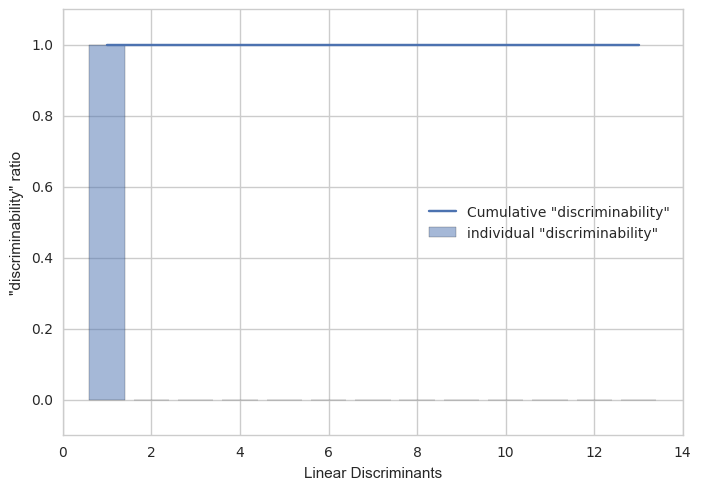

In [43]:
plt.bar(range(1,14), discr, alpha=0.5, align='center', 
        label='individual "discriminability" ')
plt.step(range(1,14), cum_discr, where='mid', 
        label='Cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()

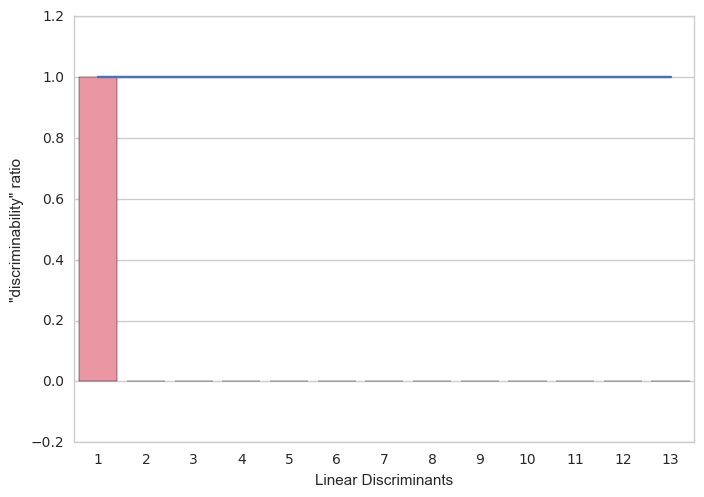

In [44]:
sns.set_style("whitegrid")
ax = sns.barplot(x=range(1,14), y=discr,)
ax.step(x=range(0,13), y=cum_discr, where='mid')
ax.set_ylabel('"discriminability" ratio')
ax.set_xlabel('Linear Discriminants')

In [45]:
# Let's now stack the two most discriminative eigenvector columns to create
# the transformation matrix W
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print 'Matrix W:\n', w

Matrix W:
[[-0.0102  0.024 ]
 [-0.0823 -0.5749]
 [-0.0546 -0.03  ]
 [-0.122   0.2214]
 [ 0.0062 -0.0052]
 [-0.2257 -0.2823]
 [ 0.8044  0.4656]
 [ 0.0942 -0.1366]
 [-0.0508 -0.2001]
 [-0.2398 -0.1386]
 [ 0.1122 -0.1568]
 [ 0.3914 -0.4682]
 [ 0.2062  0.028 ]]


## Projecting samples onto the new feature space
- using the transformation matrix $w$, we transform the training data set by multiplying the matrices
$$X'=XW$$

In [46]:
X_train_lda = X_train_std.dot(w)

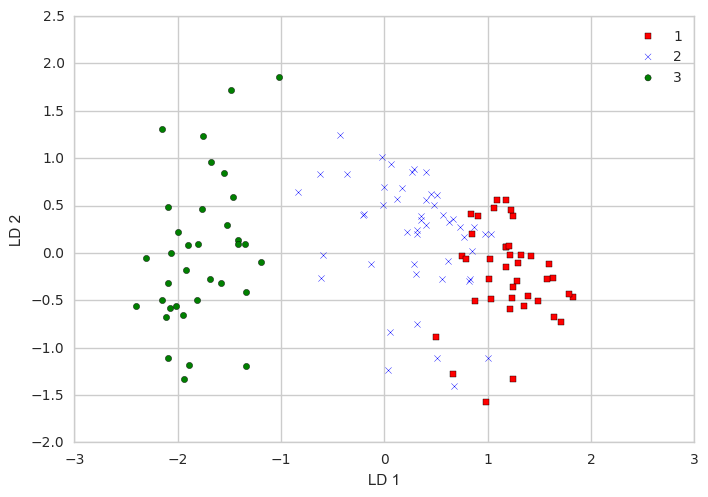

In [47]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
               X_train_lda[y_train == l, 1],
               c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='upper right')
plt.show()

## LDA via scikit-learn

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [49]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [50]:
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

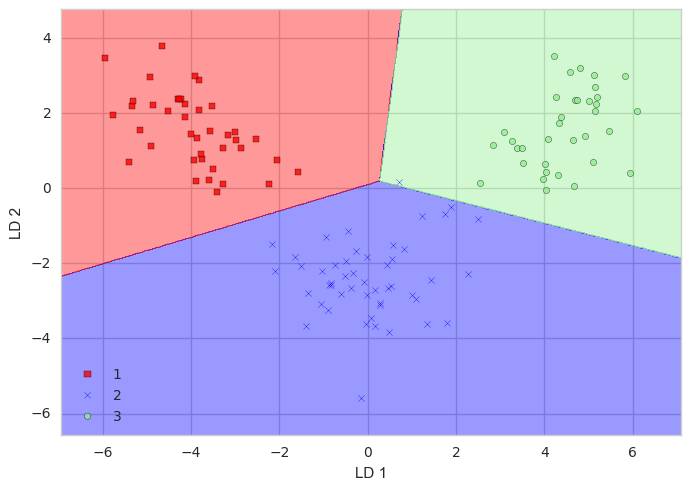

In [51]:
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

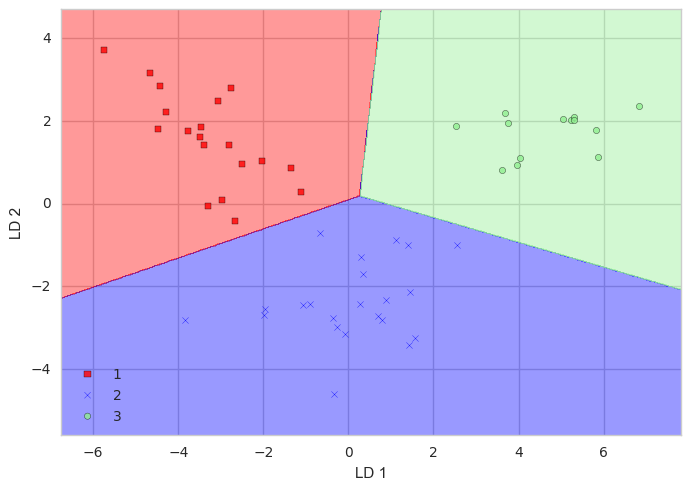

In [52]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

# Using Kernel Principal Component Analysis for nonlinear mappings
![](linearvsnonlinear.JPG)

## Kernel functions and the kernel trick
- we can tackle nonlinear problems by projecting them onto a new feature space of higher dimensionality where the classes become linearly separable.
- To transform the samples $x \in \mathbb{R}^d$ onto this higher k-dimensional subspace, we define a nonlinear mapping function $\phi $:
$$ \phi : \mathbb{R}^d \rightarrow \mathbb{R}^k (k >> d)$$
- $\phi$ is a function that creates nonlinear combinations of the original features to map the original d-dimensional dataset onto a larger, k-dimensional feature space.
- For Example, if we had feature vector $x \in \mathbb{R}^d$ (x is a column vector consisting of d features) with (d=2), a potential mapping onto a 3D space could be as follows:
$$x=\begin{bmatrix}
x_1, x_2
\end{bmatrix}^T
\overset{\phi}{\rightarrow} z=\begin{bmatrix}
x_1^2, \sqrt{2x_1x_2}, x_2^2
\end{bmatrix}^T$$
- Using PCA to compute this kind of mapping is computationally very expensive, and this is where we use the **kernel trick**.
- Using kernel trick, we can compute the similiarity between two high-dimension feature vectors in the original feature space.

#### Refresher on PCA
- Compute the covariance between two features *k* and *j* as follows:
$${\color{Blue} \sigma _{jk} = \frac{1}{n}\sum_{i=1}^{n}\left (x_{j}^{(i)}-\mu _{j} \right)\left (x_{k}^{(i)}-\mu _{k} \right)}$$
- Since the standardizing of features centers them at mean zero, we can simplify the above equation as follows:
$$ \sigma _{jk} = \frac{1}{n}\sum_{i=1}^{n}\left (x_{j}^{(i)} \right)\left (x_{k}^{(i)} \right)$$
- covariance matrix $\Sigma$:
$$ \Sigma = \frac{1}{n}\sum_{i=1}^{n}\left (x^{(i)} \right)\left (x^{(i)} \right)^T$$
- Bernhard Scholkopf generalized this approach (B. Scholkopf, A. Smola, and
K.-R. Muller. Kernel Principal Component Analysis. pages 583–588, 1997) so that we can replace the dot products between samples in the original feature space by the nonlinear feature combinations via $\phi$:

$$ \Sigma = \frac{1}{n}\sum_{i=1}^{n}\left (\phi (x^{(i)}) \right)\left (\phi( x^{(i)})^{T} \right)$$.
- In other words, what we obtain after kernel PCA are the samples already projected onto the respective components rather than constructing a transformation matrix as in the standard PCA approach.
- The kernel function calculates a dot product between two vectors( a measure of similarity).

#### Most used kernels
- **The Polynomial kernel**
$$k(x^{(i)}, x^{(j)})=(x^{(i)T}x^{(j)}+ \theta)^P$$
 - $\theta$ is the threshold and $P$ is the power that has to be specified by the user.

__________________________________________
- **The hyperbolic tangent(sigmoid) kernel**
$$k(x^{(i)}, x^{(j)})=tanh(\eta x^{(i)T}x^{(j)}+ \theta)$$

_____________________________________
- **The Radial Basis Function(RBF) or Gaussian Kernel**
$$k(x^{(i)}, x^{(j)})=exp(-\frac{\left \| x^{(i)}-x^{(j)} \right \|^2}{2\sigma ^2}) $$ 
It is also written as 
$$k(x^{(i)}, x^{(j)})=exp(-\gamma \left \| x^{(i)}-x^{(j)} \right \|^2)$$

### Three steps to implement RBF kernel PCA
1. compute the kernel(similarity) matrix k, where we need to calculate
$$k(x^{(i)}, x^{(j)})=exp(-\gamma \left \| x^{(i)}-x^{(j)} \right \|^2)$$
 - we do this for each pair of samples ![](pairs.JPG) For example, if our dataset contains 100 training samples, the symmetric kernel matrix of the pair-wise similarities would be 100x100 dimensional

2. Center the kernel matrix k using the following equation:
$$\textbf{K'}=\textbf{K}-1_n\textbf{K}-\textbf{K}1_n+1_n\textbf{K}1_n$$
 
 - $1_n$ is an nxn -dimensional matrix(the same dimensions as the kernel matrix) where all values are equal to $\frac{1}{n}$.

3. Collect the top $k$ eigenvectors of the centered kernel matrix based on their corresponding eigenvalues, which are ranked by decreasing magnitude.*In contrast to standard PCA, the eigenvectors are not the principal component axes but the samples projected onto those axes*.

### Implementing a kernel principal component analysis in python

In [53]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh

In [55]:
def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.
    
    Parameters
    -----------
    X: {Numpy ndarray}, shape = [n_samples, n_features]
    
    gamma: float
        Tuning parameter of the RBF kernel
        
    n_components: int
        Number of principal components to return
        
    Returns
    --------
    X_pc: {Numpy ndarray}, shape = [n_samples, k_features]
        Projected dataset
        
    """
    
    # calculate pairwise squared Euclidean distances in the 
    # MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')
    
    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)
    
    # Compute the symmetric kernel matrix
    K = exp(-gamma * mat_sq_dists)
    
    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.eigh returns them in sorted order
    eigvals, eigvecs = eigh(K)
    
    # Collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:, -i]
                           for i in range(1, n_components + 1)))
    
    return X_pc

## Example 1. Separating half-moon shapes

In [56]:
from sklearn.datasets import make_moons

In [57]:
X, y = make_moons(n_samples=100, random_state=123)

In [65]:
X[0]

array([ 0.8713,  0.4907])

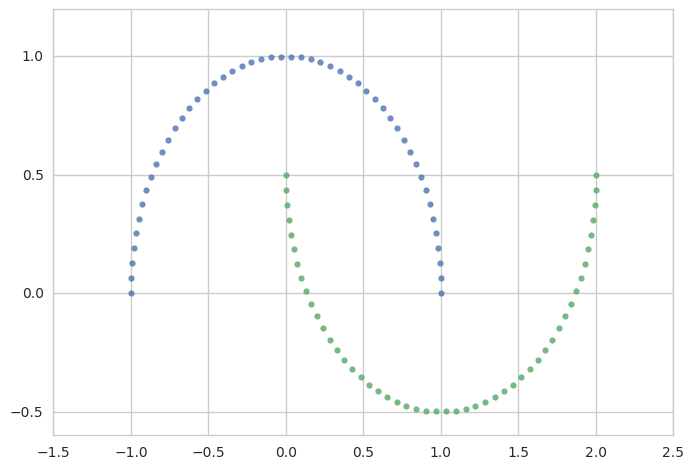

In [68]:
sns.regplot(x=X[y==0, 0], y=X[y==0,1], fit_reg=False)
sns.regplot(x=X[y==1, 0], y=X[y==1,1], fit_reg=False)
plt.show()

In [70]:
from sklearn.decomposition import PCA

In [71]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

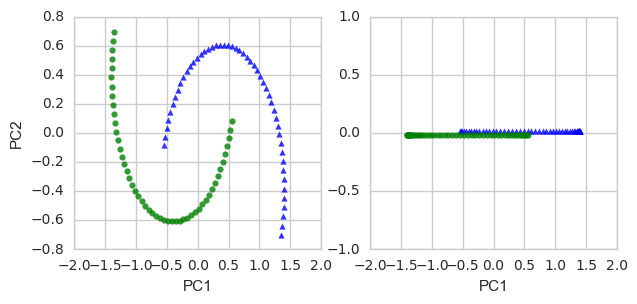

In [88]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
sns.regplot(x=X_spca[y==0, 0], y=X_spca[y==0,1], color='blue',
            marker='^', fit_reg=False, ax=ax1)
sns.regplot(x=X_spca[y==1, 0], y=X_spca[y==1,1], color='green',
            marker='o', fit_reg=False, ax=ax1)

sns.regplot(x=X_spca[y==0, 0], y= np.zeros((50,1))+0.02, color='blue',
            marker='^', fit_reg=False, ax=ax2)
sns.regplot(x=X_spca[y==1, 0], y= np.zeros((50,1))-0.02, color='green',
            marker='o', fit_reg=False, ax=ax2)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')

ax2.set_ylim([-1, 1])
ax2.set_xlabel('PC1')
plt.show()

- **Note:** PCA is an unsupervised method and does not use class label information in order to maximize the variance in contrast to LDA. The triangular and circular symbols were just added for visualization purposes to indicate the degree of separation.

- Time to try our kernel PCA function rbf_kernel_pca


In [89]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

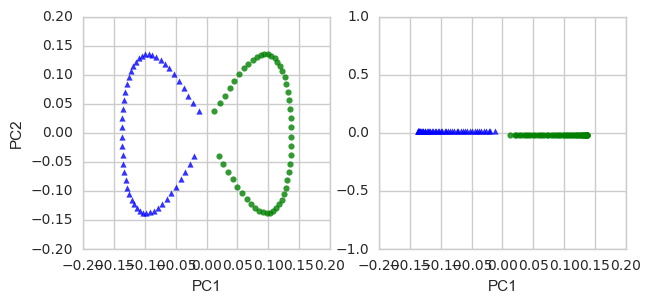

In [91]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
sns.regplot(x=X_kpca[y==0, 0], y=X_kpca[y==0,1], color='blue',
            marker='^', fit_reg=False, ax=ax1)
sns.regplot(x=X_kpca[y==1, 0], y=X_kpca[y==1,1], color='green',
            marker='o', fit_reg=False, ax=ax1)

sns.regplot(x=X_kpca[y==0, 0], y= np.zeros((50,1))+0.02, color='blue',
            marker='^', fit_reg=False, ax=ax2)
sns.regplot(x=X_kpca[y==1, 0], y= np.zeros((50,1))-0.02, color='green',
            marker='o', fit_reg=False, ax=ax2)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')

ax2.set_ylim([-1, 1])
ax2.set_xlabel('PC1')
plt.show()

- 